In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score



In [2]:
df=pd.read_csv('C:\\Users\\Ayush\\Downloads\\vehicle_data (1).csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

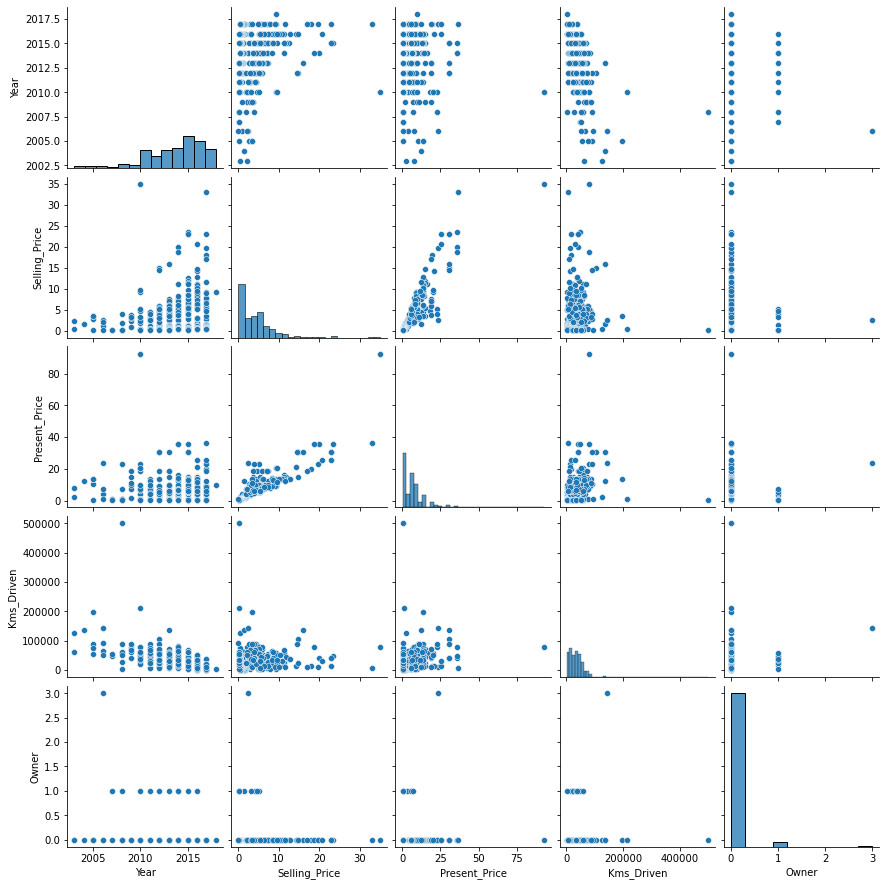

In [6]:
sns.pairplot(df)

''

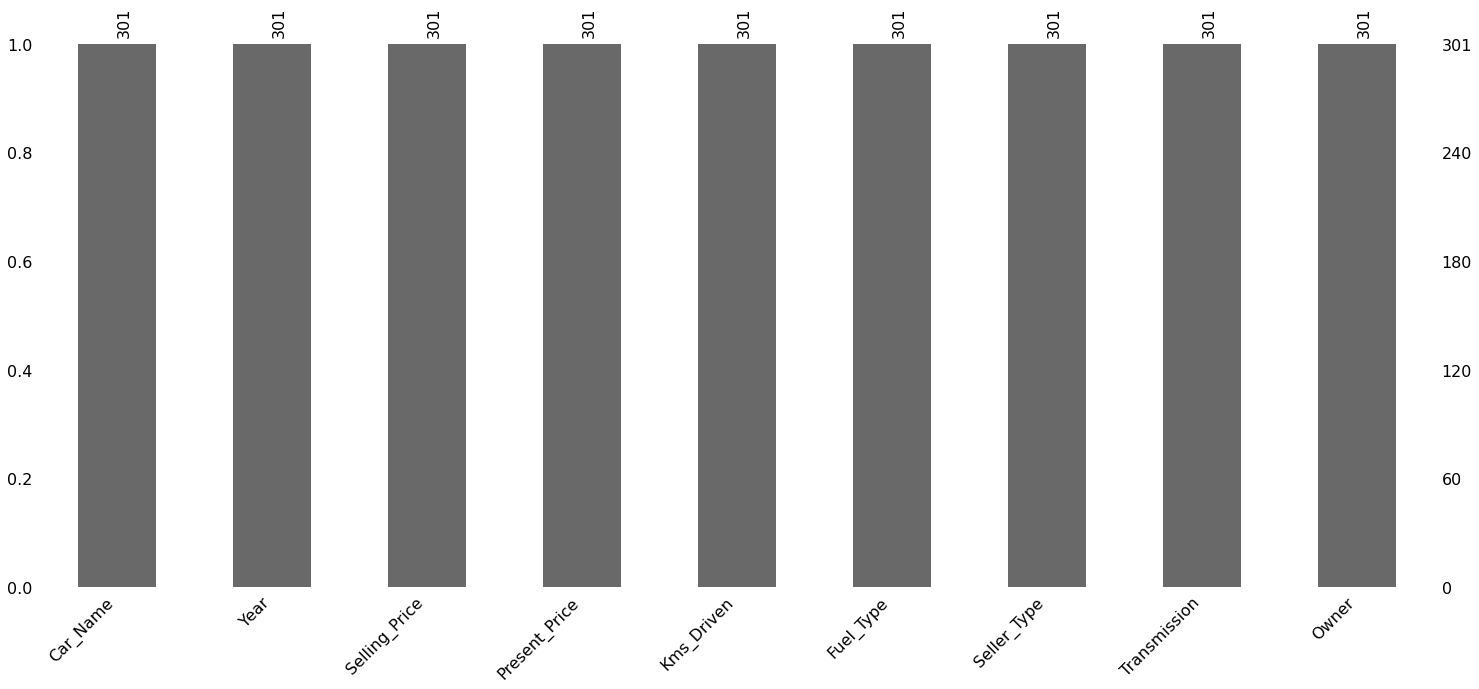

In [7]:
import missingno as msno
msno.bar(df)
;plt.xticks(rotation=90);

In [8]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


<AxesSubplot:>

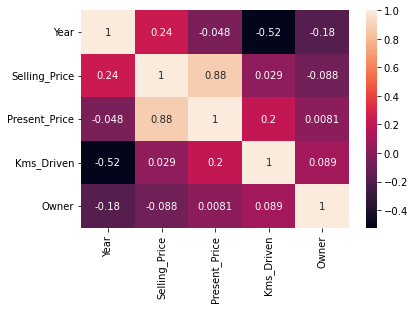

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
numeric=[int,float]  ## checking distribuation 
df_numeric=df.select_dtypes(include=numeric)
df_numeric

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

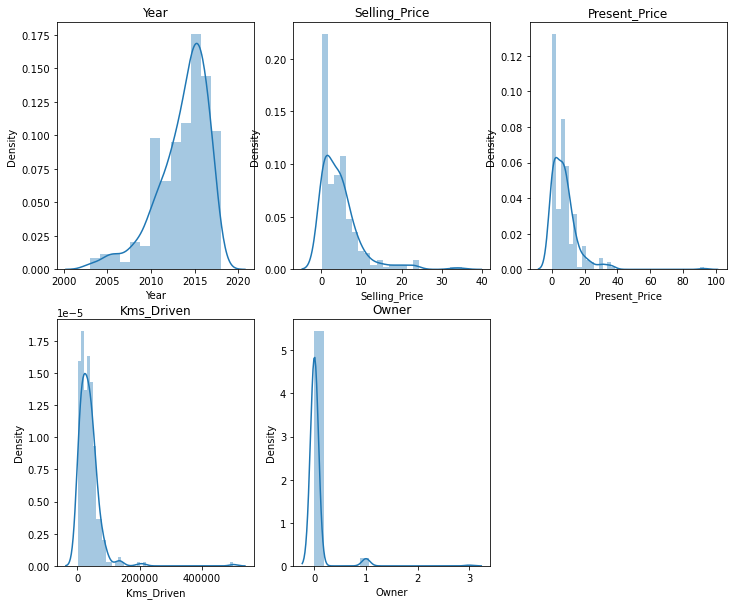

In [11]:
plt.figure(figsize=(12,10))
pos=1
for i in df_numeric:
    plt.subplot(2,3,pos)
    sns.distplot(df_numeric[i])
    plt.title(i)
    pos=pos+1

In [12]:
df_numeric.skew()

Year            -1.246189
Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
Owner            7.616850
dtype: float64

In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

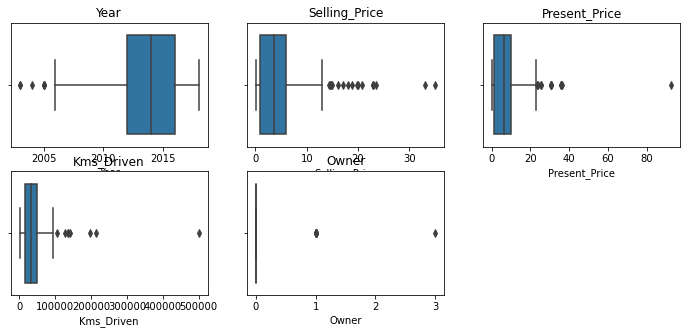

In [14]:
plt.figure(figsize=(12,5))
pos=1
for i in df_numeric:
    plt.subplot(2,3,pos)
    sns.boxplot(df_numeric[i])
    plt.title(i)
    pos=pos+1

In [15]:
# feature enginnering
df['age']=2023-df['Year']
df.drop(columns=['Year'],inplace=True)

In [16]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [17]:
for i in df.select_dtypes(include="object").columns:
    print(i,".....",df[i].unique(),".......",df[i].nunique())


Car_Name ..... ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 22

In [18]:
df1=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True) # one hot encoding

In [19]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [20]:
df1.shape

(301, 10)

In [ ]:
# WE apply  mean target encodig since there is so many categories in the car _name columns so we can not use one hoe encoding here becoz dimenality would be increse.

In [21]:
df2=df1.groupby(['Car_Name'])['Selling_Price'].agg(['mean']).reset_index()
df2

,Car_Name,mean
0,800,0.350000
1,Activa 3g,0.310000
2,Activa 4g,0.400000
3,Bajaj ct 100,0.180000
4,Bajaj Avenger 150,0.750000
...,...,...
93,sx4,3.158333
94,verna,6.107857
95,vitara brezza,9.250000
96,wagon r,2.512500


In [22]:
l=[]
for i in df1['Car_Name']:
    for j,k in df2.iterrows():
        if i==k['Car_Name']:
            l.append(k['mean'])
            
l

[2.8625,
 3.158333333333333,
 7.472222222222222,
 2.5125,
 4.54,
 9.25,
 7.472222222222222,
 6.5,
 7.472222222222222,
 7.472222222222222,
 2.85,
 7.472222222222222,
 7.472222222222222,
 6.7749999999999995,
 4.475,
 6.7749999999999995,
 6.7749999999999995,
 6.7749999999999995,
 2.5125,
 3.158333333333333,
 2.57,
 4.9,
 3.158333333333333,
 2.57,
 2.5125,
 4.54,
 4.54,
 4.54,
 2.57,
 7.472222222222222,
 2.8625,
 2.8625,
 4.54,
 6.7749999999999995,
 4.475,
 3.158333333333333,
 4.475,
 0.35,
 2.57,
 3.158333333333333,
 5.85,
 2.57,
 3.158333333333333,
 4.475,
 1.25,
 7.472222222222222,
 2.8625,
 2.5125,
 6.7749999999999995,
 7.472222222222222,
 18.685454545454544,
 18.685454545454544,
 12.777777777777779,
 18.685454545454544,
 12.777777777777779,
 7.1831249999999995,
 4.633333333333334,
 7.1831249999999995,
 4.266666666666667,
 18.685454545454544,
 7.1831249999999995,
 4.633333333333334,
 18.685454545454544,
 18.685454545454544,
 18.685454545454544,
 3.7,
 12.777777777777779,
 18.6854545454

In [25]:
df1['Car_Name']=l

In [26]:
x=df1.drop(columns=['Selling_Price'])
y=df1['Selling_Price']

In [27]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=1)

In [29]:
print(x_train.shape)
print(y_train.shape)

(240, 9)
(240,)


In [30]:
print(x_test.shape)
print(y_test.shape)

(61, 9)
(61,)


In [31]:
lr=LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred=lr.predict(x_test)

In [34]:
# Overfitting situation ( drawbacks = it may lead over fitting)

In [35]:
r2_score(y_test,y_pred)

0.9035789494878801

In [36]:
y_train_pred=lr.predict(x_train)

In [37]:
r2_score(y_train,y_train_pred) #  check accuracy train and test 

0.8915572561110517

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [39]:
l=LinearRegression()

In [40]:
# taking 5 folds 
cv=KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(lr,x_scaled,y,scoring="r2",cv=cv,n_jobs=-1) # n_jobs=-1 prcessor work only on cross validation
np.mean(scores)

0.8578599476291953